# Datapreparation

Prepare and save the data in ./data/train/ and ./data/valid/. This only needs to be done once.

In [ ]:
from dataset import prepare_data

prepare_data(100,range(1,1200),True)

# Optimize Reconstruction

### Initialize

In [2]:
from explore import Optim

device = 'cuda'
angles = 100
net_file = "network_100a.pt"

optim = Optim(angles,name=net_file,device=device)


Loaded network_100a.pt
Loaded 100 dataitems...


### Run the optimization
Select an image by choosing an *image id* and insert the desired value for *m*.

In [3]:
image_id = 5
m = 0.0

permutation = {
        "rotate": list(range(0, 360, 360//4)),
        "zoom": lambda x: [x-2, x, x+2],
        "shift": [0]
    }

results = optim.optimize(image_id, epochs=3000, mask_w=11, w_r=1.0, w_c=1.0, w_tv=0.01, lr=1.0, opt_to = m, perms=permutation)

Pre-calulate the input...


100%|██████████| 600/600 [00:02<00:00, 275.14it/s]
loss: 0.0006, radon: 0.0005, class: 0.0001, pred: 0.0087: 100%|██████████| 3000/3000 [00:25<00:00, 119.67it/s]


### Extraction of the outputs

In [4]:
xt, errors, losses, losses_r, losses_c, preds, stopiter, data_specs = results
tmean, tvar, slice, sino, low_dose, loc, malig, angles, end_sino, ld_sino = data_specs

# Plot Results

### Plot of the interior and the exterior error

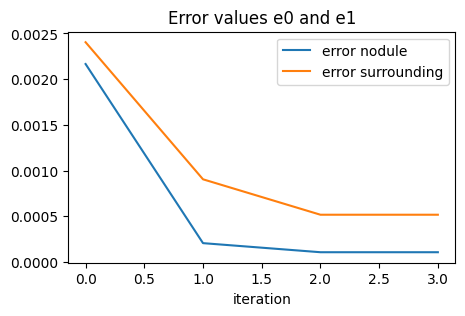

In [5]:
import torch 
import matplotlib.pyplot as plt

# prepare errors
errors2=list(zip(*errors))
errors3=list(zip(*errors2[1])) 
error_nodule = torch.stack(errors3[0])[:,0,0]
error_sur = torch.stack(errors3[1])[:,0,0]

# plot errors
plt.figure(figsize=(5,3))
plt.plot(error_nodule)
plt.plot(error_sur)
plt.title("Error values e0 and e1")
plt.xlabel("iteration")
plt.legend(["error nodule", "error surrounding"])
plt.show()

### Plot of the (cropped) reconstruction

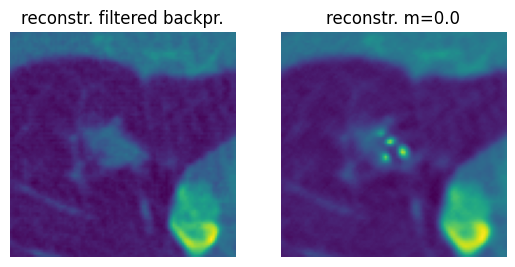

In [6]:
import dataset as ds
i=0
result_xt = (ds.crop_center(xt, loc, size=optim.nosz*3))[0,0]
startg_xt = (ds.crop_center(low_dose, loc, size=optim.nosz*3))[0,0]

fig, (ax0,ax1) = plt.subplots(1,2)
ax0.axis('off')
ax0.imshow(startg_xt)
ax0.set_title("reconstr. filtered backpr.")
ax1.axis('off')
ax1.imshow(result_xt)
ax1.set_title(f"reconstr. m={m}")

plt.show()

### Plot of the loss and the network prediction

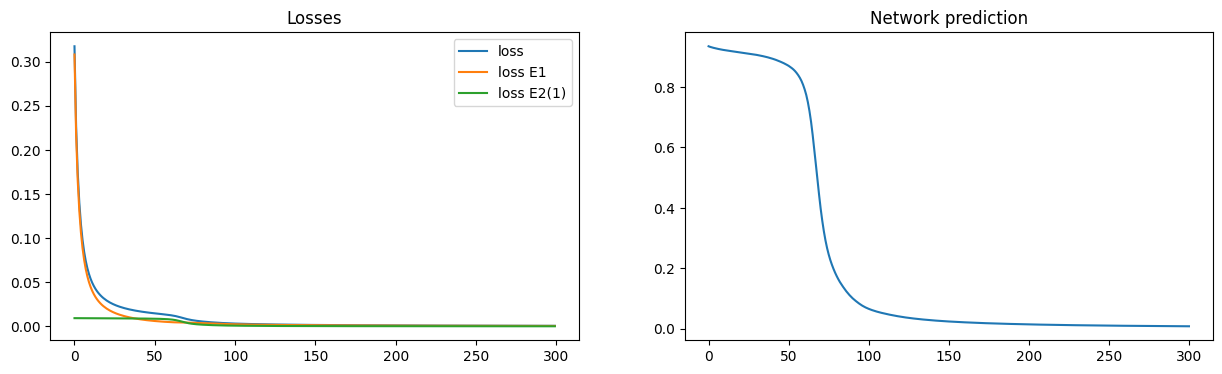

In [7]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(15,4))


ax0.plot(losses) 
ax0.plot(losses_r)
ax0.plot(losses_c)
ax0.legend(["loss","loss E1","loss E2(1)"])
ax0.set_title("Losses")

ax1.plot(preds)
ax1.set_title(f"Network prediction")
plt.show()

